## Appendice A

Per l'analisi si sono sviluppati due moduli: pytsa che contiene metodi e classi per l'analisi vera e propria dell'analisi termoelastica e il modulo RoiSelect come supporto per l'interfaccia grafica interattiva. Di seguito si ripsota un esempio per entramble le classi che si sottolinea sono comunque utilizzabili separatamente. 
Le funzioni funzioni utilizzate sono per lo più funzioni di utilizzo comune o comunque facilmente installabili
tramite Python Package Index (pip).

| **Requisiti**  | versione |
|------------|------------|
| numpy      |1.20.0|
| Numba      |0.53.1|
| matplotlib |3.4.2        |
| scipy      |1.6.3|
| sfmov      |0.2|


La libreria Numba è funzionale all'ottimizzazione della procedura di lock-in (andattandola anche a grosse aree). Malgrado sia consigliabile l'utilizzo, nella repository è presente anche la versione senza. Analogamente per la libreria scipy necessaria per la presentazione dei dati, di cui si utilizzano i moduli per il filtraggio delle immagini.
La libreria sfmov è stata svluppata del gruppo di misure ed è utilizzata per caricarare i video in formato .sfmow in cui sono esportati i file. 

-----

Si procede importando le librerie standard e il modulo analisi_tsa e RoiSelect

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
# moduli sviluppati
import sys
sys.path.insert(0,'..')
import pytsa # modulo analisi TSA
import RoiSelect # modulo si supporto grafico

Definsico la frequenza di acquisizione e il percorso del file

In [4]:
fa = 120 # freq acquisizione
fr = 40 # la frequenza di carico presunta

label_nome = 'strato_1'
livello_carico = 'H'
path_base = f'C:/Users/Rodo/Dropbox/Il mio PC (LAPTOP-SA2HR7TC)/Desktop/Tesi/Dati/{label_nome}/'
path_npy = path_base + f'cfrp_{label_nome}_{fa}Hz_f{fr}_{livello_carico}.npy' 

Si inizializza quindi l'oggetto della classe TSA. L'oggetto gestisce sia il caricamento e memorizzazione del video termico, che le operazioni svolte nel corso dell'analisi.
Per il caricamento è predisposto ad accettare video sia in forma di matrice numpy che come file esterno. Le estensioni utilizzate sono .npy,.sfmov(tramite libreria pysfmov) che in formato .mat

<IPython.core.display.Javascript object>


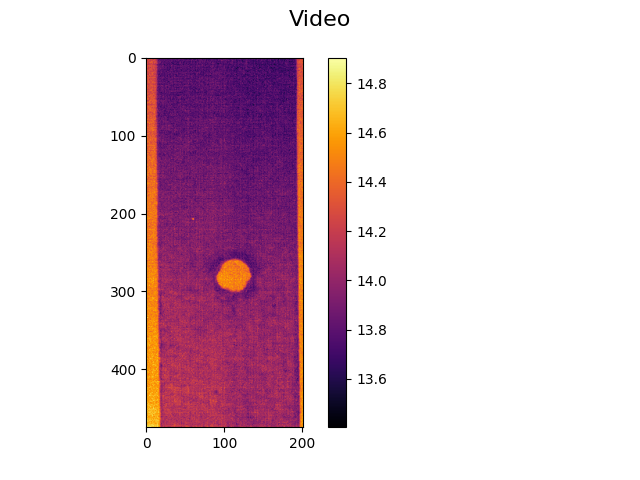

In [7]:
Analisi_40Hz = pytsa.TSA(fa,path_npy)
Analisi_40Hz.view()

Si seleziona la ROI desiderata tramite l'interfaccia fornita da RoiSelect

<IPython.core.display.Javascript object>


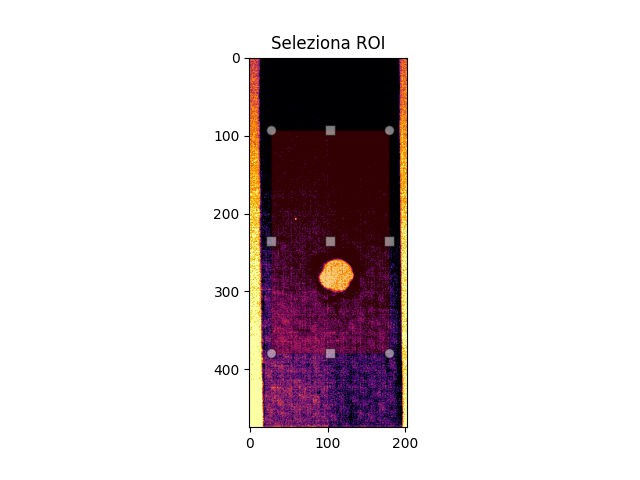

In [10]:
cordinate = RoiSelect.selectROI(Analisi_40Hz.get_roi_offset(),titolo='Seleziona ROI')

<IPython.core.display.Javascript object>


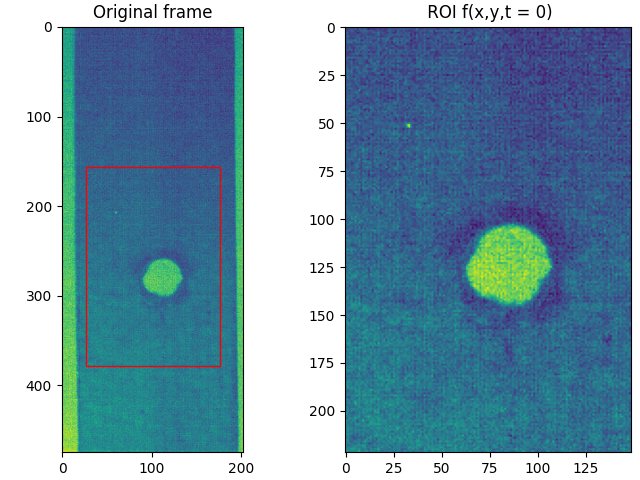

In [11]:
Analisi_40Hz.set_ROI(cordinate[1],cordinate[0],cordinate[3],cordinate[2],view = True)

Si seleziona un area circolare da escludere nell'analisi. Per cordinate si intendono i vertici del rettangolo che contiene l'elisse d'interesse.

<IPython.core.display.Javascript object>


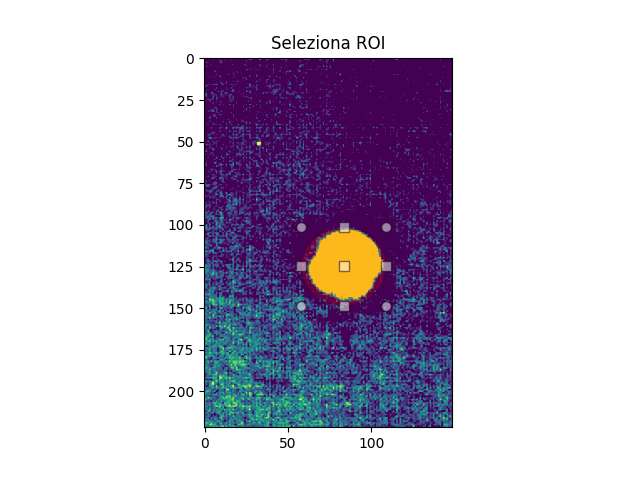

In [13]:
cordinate = RoiSelect.selectROI_ellipse(Analisi_40Hz.get_roi_offset(),titolo='Seleziona ROI')

In [14]:
Analisi_40Hz.set_hole(cordinate[1],cordinate[0],cordinate[3],cordinate[2])

Si procede con il Lock-in riferito alla frequenza di carico presunta ($f_r$) e per l'angolo di sfasamento impostato(phase_offset). Per angolo di sfasamento si intende la differenza di fase corrispondente tra l'origine dei tempi del video e la sollecitazione meccanica.

* lockin fr = 40


<IPython.core.display.Javascript object>


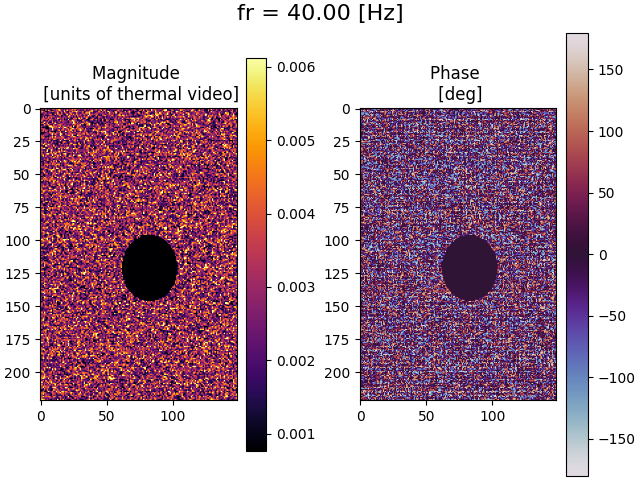

In [15]:
fr = 40 # la frequenza di carico presunta
(mappa_modulo,mappa_fase)=Analisi_40Hz.lockin(view = True,fr=fr,phase_offset=0)

Come si vede chiaramente non si ha nessuna informazione riguardo il segnale termico, ottendo mappe relative al solo rumore. Infatti in mancanza del segnale di riferimento è necessario compensare la frequenza acquisita, dato che per il banco,shaker o il generatore di segnali in ingresso la frequenza di acquisizione non sarà mai esattamente coindidente con quella predisposta.

---

Date le dimesioni in frequenza della finestra di ricerca (df) e definita con cura una zona nel provino rappresentativa della sollecitazione, si estare un segnale di riferimento mediando il video termico nella finestra per ogni Frame. Tramite FFT mi riconduco al dominio della frequenza, nella estraggo tutti i massimi locali nella banda impostata. La funzione quindi seleziona il massimo e lo confronta con il valore degli altri picchi: se questi sono entro un certa proporzione(k_scale) dal massimo vengono selezionati. Nei casi in cui non sia presente un solo picco è quindi chiesto all'utende di selezionare la frequenza con la quale procedere nell'analisi.

<IPython.core.display.Javascript object>


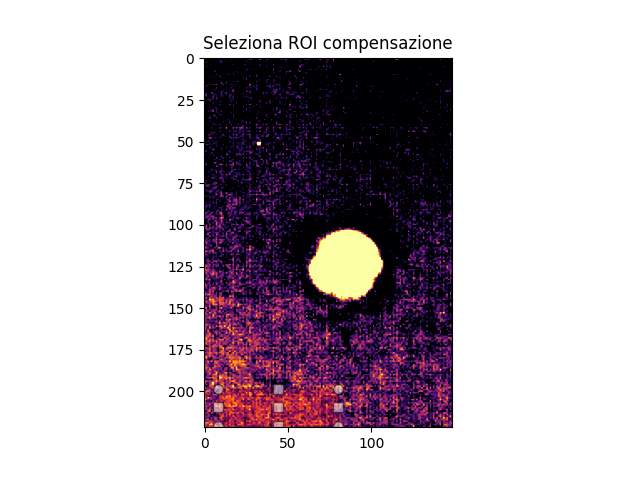

In [17]:
cordinate = RoiSelect.selectROI(Analisi_40Hz.get_roi_offset(),titolo='Seleziona ROI compensazione')

<IPython.core.display.Javascript object>


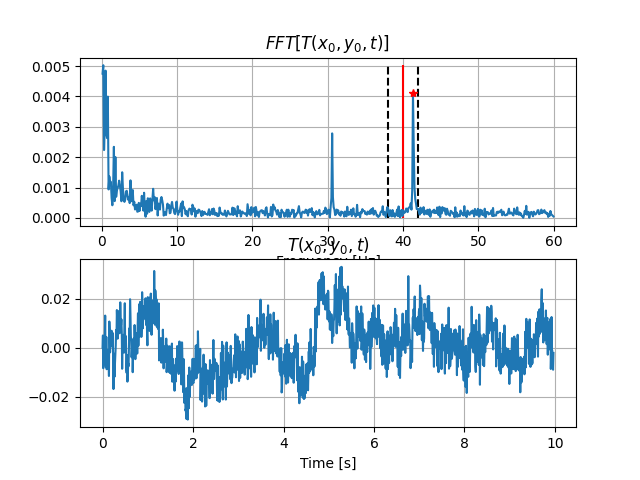

Frequency : 41.32 Hz df = 1/T = 0.10 s, phase = -27.00 deg


In [18]:
df = 4
k_scale = 0.2
_ = Analisi_40Hz.freq_detection(fr,cordinate[1],cordinate[0],cordinate[3],cordinate[2],df = df,k_scale=k_scale,view=True)

La scelta del picco è necessaria nei casi, come nell'esempio, in cui siano presenti componenti di disturbo nella finestra d'interesse oppure in cui il segnale termografico sia di entità tale da confondersi con il rumore. Ovviamente tutto ciò al netto di aver scelto correttamente la finestra di compensazione.

Dato il segnale di riferiemento è costruito digitalmente senza essere sincronizzato, la funzione di compensazione prova a ricostruire l'informazione riguardante la mappa di fase.
Sempre dalla stessa finsetra di calibrazione definita in precedenza si estre anche l'offset di fase del segnale, prendendo come riferimento la fase ottenuta tramite lockin in ogni pixel. E' quindi importante selezionare un area priva di grossi gradienti (e quindi eventuali sfasamenti dovuti a non adiabticità) ed in fase con il carico.

* lockin fr = 41.316164622842955


<IPython.core.display.Javascript object>


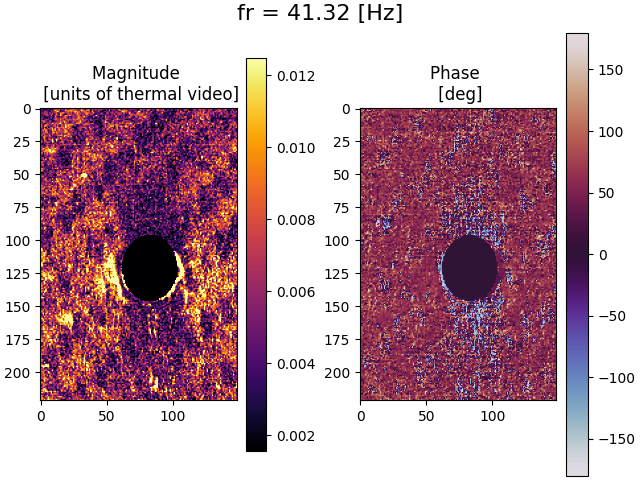

In [19]:
(mappa_modulo,mappa_fase)=Analisi_40Hz.lockin(view = True,t_lim_inf = None, t_lim_sup = None)

I livelli della color map per la mappa di fase sono impostati in
automatico, prendendo un fissato percentile dell'intera mappa nel definirne i limiti.
Si procede con il salvataggio delle mappe di modulo e fase e con la
visualizzazione della mappa dei livelli (contour plot) della mappa di modulo

<IPython.core.display.Javascript object>


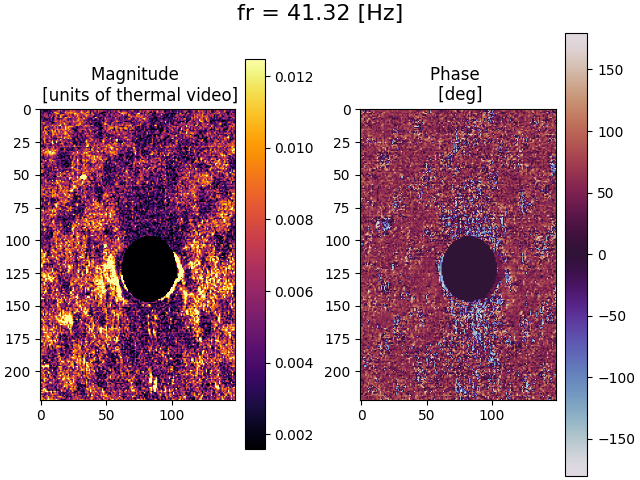

<IPython.core.display.Javascript object>


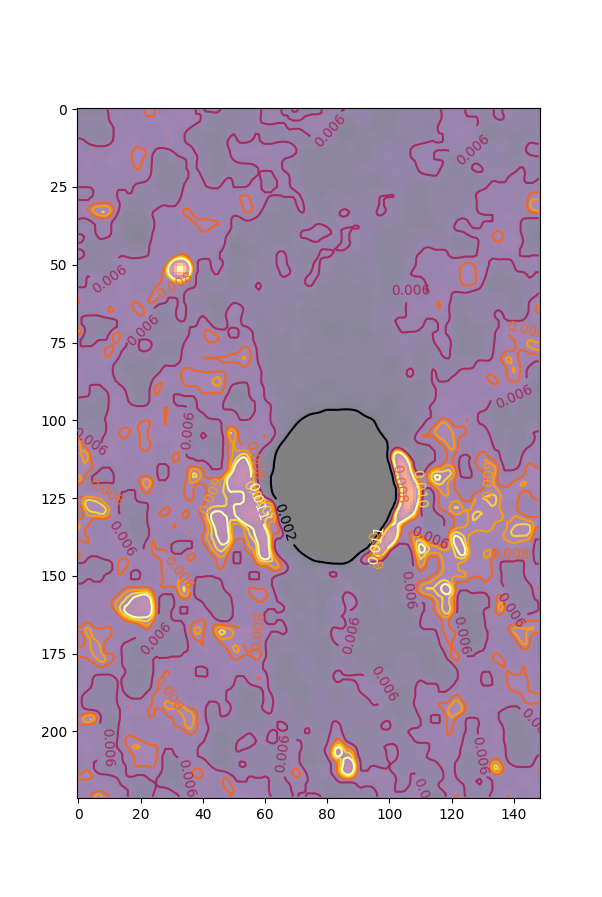

In [20]:
path = f'C:/Users/Rodo/Dropbox/Il mio PC (LAPTOP-SA2HR7TC)/Desktop/Tesi/Dati/'
Analisi_40Hz.save(path = path,name_file='Risultati_30Hz')
Analisi_40Hz.view_result_coutour_plot(levels=[0.002,0.006,0.008,0.009,0.01,0.011])

Nella presentazione dei dati e nella successiva interpretazione, la selezione della color map non è un aspetto secondario. Per questo motivo si è predisposto un metodo per impostarla automaticamente.

<IPython.core.display.Javascript object>


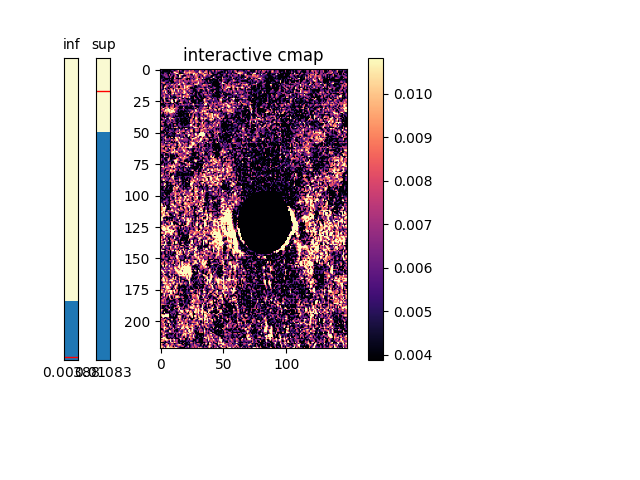

In [26]:
_ = Analisi_40Hz.set_cmap_lim(interactive=True)

Analogamente anche la compensazione automatica della fase può portare a risultati errati e per questo motivo si fornita la possibilità di aggiustare l'offeset di fase manualmente

<IPython.core.display.Javascript object>


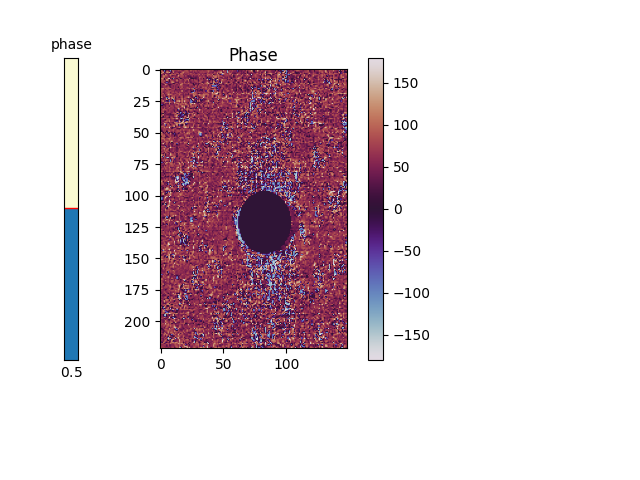

In [23]:
Analisi_40Hz.set_phase_offset()

Infine si ha una funzione per la visuliazzazione dell'andamento del modulo lungo una linea.

<IPython.core.display.Javascript object>


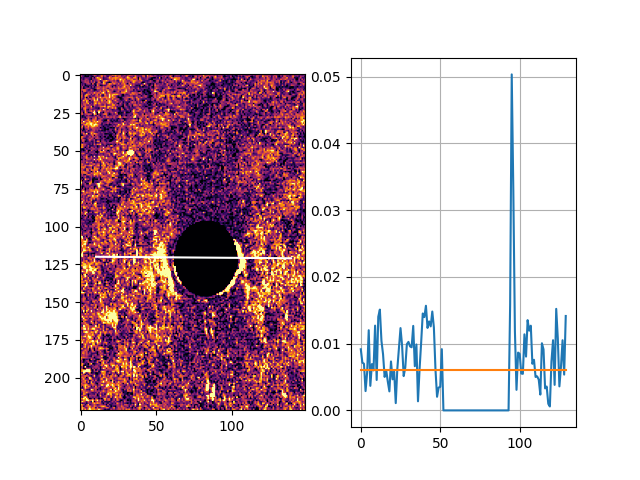

In [25]:
cordinate = (10,120,140,121) # (yi,xi,yf,xf)
_ = Analisi_40Hz.result_line(cordinate[1],cordinate[0],cordinate[3],cordinate[2],view = True)